In [55]:
import numpy as np

PLA(感知机)：

In [56]:
def LoadData(fileName):
    dataArray=[]
    labelArray=[]
    fr = open(fileName,'r')
    for line in fr.readlines():
        curLine = line.strip().split(',')
        if int(curLine[0]) >=1:
            labelArray.append(-1)
        else:
            labelArray.append(1)
        dataArray.append([int(num)/255 for num in curLine[1:]])
    return dataArray,labelArray

In [57]:
trainData, trainLabel = LoadData('./mnist.train.csv')

In [34]:
datamat=np.mat(trainData)

In [35]:
labelmat=np.mat(trainLabel).T

In [36]:
m,n = np.shape(datamat)

In [37]:
w= np.zeros((1,n))
b=0
h=0.0001

In [38]:
for i in range(50):
    for j in range(m):
        xi = datamat[j]
        yi = labelmat[j]
        if -1*yi*(w*xi.T+b)>=0:
            w = w + h*yi*xi
            b=b + h*yi
    


In [3]:
testData, testLabel = LoadData('./mnist_test.csv')

In [40]:
testDataMat=np.mat(testData)
testLabelMat=np.mat(testLabel).T

In [41]:
c,d = np.shape(testDataMat)

In [42]:
errorCnt=0
for k in range(c):
    xi_test=testDataMat[k]
    yi_test=testLabelMat[k]
    result=-1*yi_test*(w*xi_test.T+b)
    if result>=0:
        errorCnt +=1
    accruRate = 1 - (errorCnt / c)
print('PLA准确率为',accruRate)

PLA准确率为 0.9925


逻辑斯蒂回归:

In [4]:
for i in range (len(trainData)):
    trainData[i].append(1)

In [7]:
    trainData=np.mat(trainData)

In [8]:
w1=np.zeros((1,trainData.shape[1]))

In [9]:
h1=0.001

In [10]:
trainData.shape

(60000, 785)

In [11]:
for i in range(50):
    for j in range(trainData.shape[0]):
        wx=np.dot(w1,trainData[j].T)
        yii=trainLabel[j]
        xii=trainData[j]
        w1 +=h1*(xii*yii-(np.exp(wx)*xii)/(1+np.exp(wx)))
    if i % 10 ==0:
        print('循环第%d轮啦'%i)

循环第0轮啦
循环第10轮啦
循环第20轮啦
循环第30轮啦
循环第40轮啦


In [12]:
def predict(w1,x):
    w1x=np.dot(w1,x)
    P_1=np.exp(w1x)/(1+np.exp(w1x))
    if P_1>=0.5:
        return 1
    else:
        return -1

In [13]:
for i in range(len(testData)):
    testData[i].append(1)
    

In [14]:
testData=np.mat(testData)

In [15]:
errorCnt1=0
for i in range(len(testData)):
    if testLabel[i] !=predict(w1,testData[i].T):
        errorCnt1 +=1
accruRate1 = 1- errorCnt1 / len(testData)
print('逻辑回归的准确率为',accruRate1)

逻辑回归的准确率为 0.902


支持向量机(SVM)：

In [59]:
sigma=10
C=200
toler=0.001


In [58]:
traindatamat=np.mat(trainData)
trainlabelmat=np.mat(trainLabel).T

In [60]:
testdatalist,testlabellist=LoadData('./mnist_test.csv')

In [61]:
testdatalist=np.mat(testdatalist)
testlabellist=np.mat(testlabellist).T
testdatalist=testdatalist[:100]
testlabellist=testlabellist[:100]

In [62]:
traindatamat=traindatamat[:100]
trainlabelmat=trainlabelmat[:100]

In [63]:
m,n=np.shape(traindatamat)

In [76]:
supportVectorIndex=[]
def SVMtrain(iter=100):
    iterStep = 0 ; parameterChanged = 1
    b=0
    k=calculate_kernelfunction()
    E = [0 * trainlabelmat[i, 0] for i in range(trainlabelmat.shape[0])]
    while(iterStep< iter) and (parameterChanged>0):
        print('iter:%d:%d'%(iterStep,iter))
        iterStep+=1
        parameterChanged=0
        for i in range(m):
            if issatisfyKKT(i)==False:
                E1 = calculate_EI(i)
                E2,j=getAlphaJ(E1,i)
                y1=trainlabelmat[i]
                y2=trainlabelmat[j]
                alphaOld_1=alpha[i]
                alphaOld_2=alpha[j]
                if y1!=y2:
                    L=max(0,alphaOld_2-alphaOld_1)
                    H=min(C,C+alphaOld_2-alphaOld_1)
                else:
                    L=max(0,alphaOld_2+alphaOld_1-C)
                    H=min(C,alphaOld_2+alphaOld_1)
                if L==H:   continue
                k11=k[i][i]
                k12=k[i][j]
                k21=k[j][i]
                k22=k[j][j]
                alphaNew_2 = alphaOld_2 + y2 * (E1-E2)/(k11+k22-2*k12)
                # 剪辑α2
                if alphaNew_2 < L:alphaNew_2=L
                elif alphaNew_2 > H:alphaNew_2=H
                alphaNew_1 = alphaOld_1 + y1 * y2 * (alphaOld_2-alphaNew_2)
                b1New = -1 * E1 - y1 * k11 * (alphaNew_1 - alphaOld_1) - y2 * k21 * (alphaNew_2 - alphaOld_2) +b
                b2New = -1 * E2 - y1 * k12 * (alphaNew_1 - alphaOld_1) - y2 * k22 * (alphaNew_2 - alphaOld_2) +b
                #依据α1和α2的值范围确定新b
                if (alphaNew_1 > 0) and (alphaNew_1 < C):
                    bNew = b1New
                elif (alphaNew_2 > 0) and (alphaNew_2 < C):
                    bNew = b2New
                else:
                    bNew = (b1New + b2New) / 2
                alpha[i]=alphaNew_1
                alpha[j]=alphaNew_2
                b=bNew
                E[i]=calculate_EI(i)
                E[j]=calculate_EI(j)
                if math.fabs(alphaNew_2 - alphaOld_2) >= 0.00001:
                    parameterChanged += 1
            print("iter: %d i:%d, pairs changed %d" % (iterStep, i, parameterChanged))
    for i in range(m):
        if alpha[i]>0:
            supportVectorIndex.append(i)
                

In [75]:
import random
def getAlphaJ(E1,i):
    E2=0
    maxE1_E2=-1
    maxindex=-1
    #这一步是一个优化性的算法
        #实际上书上算法中初始时每一个Ei应当都为-yi（因为g(xi)由于初始α为0，必然为0）
        #然后每次按照书中第二步去计算不同的E2来使得|E1-E2|最大，但是时间耗费太长了
        #作者最初是全部按照书中缩写，但是本函数在需要3秒左右，所以进行了一些优化措施
        #--------------------------------------------------
        #在Ei的初始化中，由于所有α为0，所以一开始是设置Ei初始值为-yi。这里修改为与α
        #一致，初始状态所有Ei为0，在运行过程中再逐步更新
        #因此在挑选第二个变量时，只考虑更新过Ei的变量，但是存在问题
        #1.当程序刚开始运行时，所有Ei都是0，那挑谁呢？
        #   当程序检测到并没有Ei为非0时，将会使用随机函数随机挑选一个
        #2.怎么保证能和书中的方法保持一样的有效性呢？
        #   在挑选第一个变量时是有一个大循环的，它能保证遍历到每一个xi，并更新xi的值，
        #在程序运行后期后其实绝大部分Ei都已经更新完毕了。下方优化算法只不过是在程序运行
        #的前半程进行了时间的加速，在程序后期其实与未优化的情况无异
        #------------------------------------------------------
        #获得Ei非0的对应索引组成的列表，列表内容为非0Ei的下标i
    E = [0 * trainlabelmat[i, 0] for i in range(trainlabelmat.shape[0])]
    nozeroE=[i for i,Ei in enumerate(E) if Ei !=0]
    for j in nozeroE:
        E2_tmp = calculate_EI(j)
        if math.fabs(E1-E2_tmp)>maxE1_E2:
            maxE1_E2 = math.fabs(E1-E2_tmp)
            E2=E2_tmp
            maxindex=j
    if maxindex ==-1:
        maxindex=i
        while maxindex==i:
            maxindex = int(random.uniform(0,m))
        E2 = calculate_EI(maxindex)
    return E2,maxindex

In [67]:
import math
def issatisfyKKT(i):
    toler=0.001
    gxi=calculate_gxi(i)
    yi=trainlabelmat[i]
    if (math.fabs(alpha[i]) < toler) and (yi * gxi >= 1):
        return True
        #依据7.113
    elif (math.fabs(alpha[i] - C) <toler) and (yi * gxi <= 1):
        return True
        #依据7.112
    elif (alpha[i] > -toler) and (alpha[i] < (C + toler)) and (math.fabs(yi * gxi - 1) < toler):
        return True
    return False

In [68]:
alpha=[0]*traindatamat.shape[0]


In [69]:
def calculate_gxi(i):
    gxi=0
    k=calculate_kernelfunction()
    #因为g(xi)是一个求和式+b的形式，普通做法应该是直接求出求和式中的每一项再相加即可
        #但是在“7.2.3 支持向量”开头第一句话有说到“对应于α>0的样本点
        #(xi, yi)的实例xi称为支持向量”。也就是说只有支持向量的α是大于0的，在求和式内的
        #对应的αi*yi*K(xi, xj)不为0，非支持向量的αi*yi*K(xi, xj)必为0，也就不需要参与
        #到计算中。也就是说，在g(xi)内部求和式的运算中，只需要计算α>0的部分，其余部分可
        #忽略。因为支持向量的数量是比较少的，这样可以再很大程度上节约时间
        #从另一角度看，抛掉支持向量的概念，如果α为0，αi*yi*K(xi, xj)本身也必为0，从数学
        #角度上将也可以扔掉不算
        #index获得非零α的下标，并做成列表形式方便后续遍历
    index=[i for i ,alpha in enumerate(alpha) if alpha !=0]
    for j in index:
        gxi+=alpha[j]*trainlabelmat[j]*k[j][i]
    gxi=gxi+b
    return gxi

In [70]:
def calculate_EI(i):
    gxi=calculate_gxi(i)
    return gxi-trainlabelmat[i]

In [71]:
def calculate_kernelfunction():
    k=[[0 for i in range(m)]for j in range(m)]
    for i in range(m):
        X=traindatamat[i,:]
        for j in range(i,m):
            Z=traindatamat[j,:]
            gussian_result=(X-Z)*(X-Z).T
            gussian_result=np.exp(-1*gussian_result/(2*sigma**2))
            k[i][j]=gussian_result
            k[j][i]=gussian_result
    return k

In [72]:
def calculateSingleKernelFunction(x1,x2):
    result = (x1 - x2) * (x1 - x2).T
    result = np.exp(-1 * result / (2 * sigma ** 2))
    return np.exp(result)

In [73]:
def predict(x):
    result=0
    for i in supportVectorIndex:
        tmp=calculateSingleKernelFunction(traindatamat[i,:],np.mat(x))
        result+=alpha[i]*trainlabelmat[i]*tmp
    result+=b
    return np.sign(result)



In [74]:
def test(self, testDataList, testLabelList):
    '''
    测试
    :param testDataList:测试数据集
    :param testLabelList: 测试标签集
    :return: 正确率
    '''
    #错误计数值
    errorCnt = 0
    #遍历测试集所有样本
    for i in range(len(testDataList)):
        #打印目前进度
        print('test:%d:%d'%(i, len(testDataList)))
        #获取预测结果
        result = self.predict(testDataList[i])
        #如果预测与标签不一致，错误计数值加一
        if result != testLabelList[i]:
            errorCnt += 1
        #返回正确率
    return 1 - errorCnt / len(testDataList)


In [77]:
SVMtrain()

iter:0:100
iter: 1 i:0, pairs changed 1
iter: 1 i:1, pairs changed 2
iter: 1 i:2, pairs changed 3
iter: 1 i:8, pairs changed 3
iter: 1 i:21, pairs changed 3
iter: 1 i:29, pairs changed 4
iter: 1 i:34, pairs changed 5
iter: 1 i:36, pairs changed 6
iter: 1 i:37, pairs changed 7
iter: 1 i:40, pairs changed 7
iter: 1 i:41, pairs changed 8
iter: 1 i:42, pairs changed 8
iter: 1 i:43, pairs changed 8
iter: 1 i:44, pairs changed 8
iter: 1 i:47, pairs changed 9
iter: 1 i:49, pairs changed 10
iter: 1 i:51, pairs changed 11
iter: 1 i:53, pairs changed 11
iter: 1 i:56, pairs changed 12
iter: 1 i:57, pairs changed 12
iter: 1 i:59, pairs changed 12
iter: 1 i:61, pairs changed 12
iter: 1 i:62, pairs changed 13
iter: 1 i:63, pairs changed 13
iter: 1 i:64, pairs changed 14
iter: 1 i:67, pairs changed 14
iter: 1 i:68, pairs changed 15
iter: 1 i:69, pairs changed 15
iter: 1 i:70, pairs changed 16
iter: 1 i:71, pairs changed 16
iter: 1 i:72, pairs changed 16
iter: 1 i:75, pairs changed 16
iter: 1 i:77, pa

KeyboardInterrupt: 

In [ ]:
import numpy as np
from scipy.special import expit

class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_output : int
        Number of output units, should be equal to the
        number of unique class labels.
    n_features : int
        Number of features (dimensions) in the target dataset.
        Should be equal to the number of columns in the X array.
    n_hidden : int (default: 30)
        Number of hidden units.
    l1 : float (default: 0.0)
        Lambda value for L1-regularization.
        No regularization if l1=0.0 (default)
    l2 : float (default: 0.0)
        Lambda value for L2-regularization.
        No regularization if l2=0.0 (default)
    epochs : int (default: 500)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    alpha : float (default: 0.0)
        Momentum constant. Factor multiplied with the
        gradient of the previous epoch t-1 to improve
        learning speed
        w(t) := w(t) - (grad(t) + alpha*grad(t-1))
    decrease_const : float (default: 0.0)
        Decrease constant. Shrinks the learning rate
        after each epoch via eta / (1 + epoch*decrease_const)
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent circles.
    minibatches : int (default: 1)
        Divides training data into k minibatches for efficiency.
        Normal gradient descent learning if k=1 (default).
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.

    Attributes
    -----------
    cost_ : list
      Sum of squared errors after each epoch.

    """
    def __init__(self, n_output, n_features, n_hidden=30,
                 l1=0.0, l2=0.0, epochs=500, eta=0.001,
                 alpha=0.0, decrease_const=0.0, shuffle=True,
                 minibatches=1, random_state=None):

        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches

    def _encode_labels(self, y, k):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_samples ]
            Target values.

        Returns
        -----------
        onehot : array, shape = (n_labels, n_samples)

        """
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        w1 = np.random.uniform(-1.0, 1.0,
                               size=self.n_hidden*(self.n_features + 1))
        w1 = w1.reshape(self.n_hidden, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0,
                               size=self.n_output*(self.n_hidden + 1))
        w2 = w2.reshape(self.n_output, self.n_hidden + 1)
        return w1, w2

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)

        Uses scipy.special.expit to avoid overflow
        error for very small input values z.

        """
        # return 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    def _sigmoid_gradient(self, z):
        """Compute gradient of the logistic function"""
        sg = self._sigmoid(z)
        return sg * (1.0 - sg)

    def _add_bias_unit(self, X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1] + 1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0] + 1, X.shape[1]))
            X_new[1:, :] = X
        else:
            raise AttributeError('`how` must be `column` or `row`')
        return X_new

    def _feedforward(self, X, w1, w2):
        """Compute feedforward step

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
            Input layer with original features.
        w1 : array, shape = [n_hidden_units, n_features]
            Weight matrix for input layer -> hidden layer.
        w2 : array, shape = [n_output_units, n_hidden_units]
            Weight matrix for hidden layer -> output layer.

        Returns
        ----------
        a1 : array, shape = [n_samples, n_features+1]
            Input values with bias unit.
        z2 : array, shape = [n_hidden, n_samples]
            Net input of hidden layer.
        a2 : array, shape = [n_hidden+1, n_samples]
            Activation of hidden layer.
        z3 : array, shape = [n_output_units, n_samples]
            Net input of output layer.
        a3 : array, shape = [n_output_units, n_samples]
            Activation of output layer.

        """
        a1 = self._add_bias_unit(X, how='column')
        z2 = w1.dot(a1.T)
        a2 = self._sigmoid(z2)
        a2 = self._add_bias_unit(a2, how='row')
        z3 = w2.dot(a2)
        a3 = self._sigmoid(z3)
        return a1, z2, a2, z3, a3

    def _L2_reg(self, lambda_, w1, w2):
        """Compute L2-regularization cost"""
        return (lambda_/2.0) * (np.sum(w1[:, 1:] ** 2) +
                                np.sum(w2[:, 1:] ** 2))

    def _L1_reg(self, lambda_, w1, w2):
        """Compute L1-regularization cost"""
        return (lambda_/2.0) * (np.abs(w1[:, 1:]).sum() +
                                np.abs(w2[:, 1:]).sum())

    def _get_cost(self, y_enc, output, w1, w2):
        """Compute cost function.

        Parameters
        ----------
        y_enc : array, shape = (n_labels, n_samples)
            one-hot encoded class labels.
        output : array, shape = [n_output_units, n_samples]
            Activation of the output layer (feedforward)
        w1 : array, shape = [n_hidden_units, n_features]
            Weight matrix for input layer -> hidden layer.
        w2 : array, shape = [n_output_units, n_hidden_units]
            Weight matrix for hidden layer -> output layer.

        Returns
        ---------
        cost : float
            Regularized cost.

        """
        term1 = -y_enc * (np.log(output))
        term2 = (1.0 - y_enc) * np.log(1.0 - output)
        cost = np.sum(term1 - term2)
        L1_term = self._L1_reg(self.l1, w1, w2)
        L2_term = self._L2_reg(self.l2, w1, w2)
        cost = cost + L1_term + L2_term
        return cost

    def _get_gradient(self, a1, a2, a3, z2, y_enc, w1, w2):
        """ Compute gradient step using backpropagation.

        Parameters
        ------------
        a1 : array, shape = [n_samples, n_features+1]
            Input values with bias unit.
        a2 : array, shape = [n_hidden+1, n_samples]
            Activation of hidden layer.
        a3 : array, shape = [n_output_units, n_samples]
            Activation of output layer.
        z2 : array, shape = [n_hidden, n_samples]
            Net input of hidden layer.
        y_enc : array, shape = (n_labels, n_samples)
            one-hot encoded class labels.
        w1 : array, shape = [n_hidden_units, n_features]
            Weight matrix for input layer -> hidden layer.
        w2 : array, shape = [n_output_units, n_hidden_units]
            Weight matrix for hidden layer -> output layer.

        Returns
        ---------
        grad1 : array, shape = [n_hidden_units, n_features]
            Gradient of the weight matrix w1.
        grad2 : array, shape = [n_output_units, n_hidden_units]
            Gradient of the weight matrix w2.

        """
        # backpropagation
        sigma3 = a3 - y_enc
        z2 = self._add_bias_unit(z2, how='row')
        sigma2 = w2.T.dot(sigma3) * self._sigmoid_gradient(z2)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(a1)
        grad2 = sigma3.dot(a2.T)

        # regularize
        grad1[:, 1:] += (w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (w2[:, 1:] * (self.l1 + self.l2))

        return grad1, grad2

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
            Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_samples]
            Predicted class labels.

        """
        if len(X.shape) != 2:
            raise AttributeError('X must be a [n_samples, n_features] array.\n'
                                 'Use X[:,None] for 1-feature classification,'
                                 '\nor X[[i]] for 1-sample classification')

        a1, z2, a2, z3, a3 = self._feedforward(X, self.w1, self.w2)
        y_pred = np.argmax(z3, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data.

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
            Input layer with original features.
        y : array, shape = [n_samples]
            Target class labels.
        print_progress : bool (default: False)
            Prints progress as the number of epochs
            to stderr.

        Returns:
        ----------
        self

        """
        self.cost_ = []
        X_data, y_data = X.copy(), y.copy()
        y_enc = self._encode_labels(y, self.n_output)

        delta_w1_prev = np.zeros(self.w1.shape)
        delta_w2_prev = np.zeros(self.w2.shape)

        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, y_enc = X_data[idx], y_enc[:, idx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            for idx in mini:

                # feedforward
                a1, z2, a2, z3, a3 = self._feedforward(X_data[idx],
                                                       self.w1,
                                                       self.w2)
                cost = self._get_cost(y_enc=y_enc[:, idx],
                                      output=a3,
                                      w1=self.w1,
                                      w2=self.w2)
                self.cost_.append(cost)

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(a1=a1, a2=a2,
                                                  a3=a3, z2=z2,
                                                  y_enc=y_enc[:, idx],
                                                  w1=self.w1,
                                                  w2=self.w2)

                delta_w1, delta_w2 = self.eta * grad1, self.eta * grad2
                self.w1 -= (delta_w1 + (self.alpha * delta_w1_prev))
                self.w2 -= (delta_w2 + (self.alpha * delta_w2_prev))
                delta_w1_prev, delta_w2_prev = delta_w1, delta_w2

        return self

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


In [2]:
iris=load_iris()

In [ ]:
x

In [12]:
x=iris.data
x_norm=StandardScaler().fit_transform(x)
x_norm.mean(axis=0)


array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [13]:
ew,ev=np.linalg.eig(np.cov(x_norm.T))

In [14]:
ew_oreder=np.argsort(ew)[::-1]
ew_sort=ew[ew_oreder]
ev_sort = ev[:, ew_oreder] # ev的每一列代表一个特征向量
ev_sort.shape # (4,4)

(4, 4)

In [15]:
K = 2
V = ev_sort[:, :2] # 4*2 

In [17]:
X_new = x_norm.dot(V) # shape (150,2)

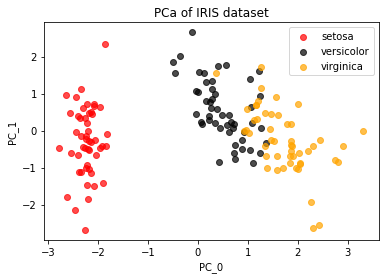

In [18]:
colors = ['red', 'black', 'orange']

plt.figure()
for i in [0, 1, 2]:
    plt.scatter(X_new[iris.target==i, 0],
    X_new[iris.target==i, 1],
    alpha=.7,
    c=colors[i],
    label=iris.target_names[i]
    )

plt.legend()
plt.title('PCa of IRIS dataset')
plt.xlabel('PC_0')
plt.ylabel('PC_1')
plt.show()

C:\Users\HWW\AppData\Local\Temp/ipykernel_15948/1683663969.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


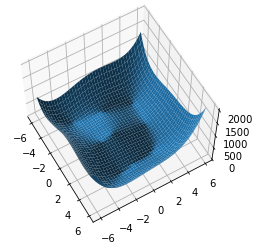

In [20]:
def himmelblau(x):
    return (x[0]**2 + x[1]-11)**2 + (x[0] + x[1]**2-7)**2
x=np.arange(-6,6,0.1)
y=np.arange(-6,6,0.1)
X,Y=np.meshgrid(x,y)
z=himmelblau([X,Y])
fig=plt.figure('himmelblau')
ax=fig.gca(projection='3d')
ax.plot_surface(X,Y,z)
ax.view_init(60,-30)
plt.show()